In [123]:
#!/usr/bin/env python3

import pandas as pd
import os
import matplotlib.pyplot as plt
import operator

'''
Author: Enrico Ceccolini
    TODO write the description
'''
datadir = "/datasets/eurora_data/db_local/"

In [124]:
def my_plot(x_pow, y_values, y_val, off_y, lable_1, lable_2):
    
    PCP3 = [y_val]*(len(y_values)+2)
    PCP3P = [None, None] + y_values 
    min_pow = min(x_pow)
    POWS = [min_pow-1000, min_pow-500] + x_pow

    plt.figure(1, figsize = (8, 5))
    #plt.suptitle('plot title')
    ax = []
    plt.plot(POWS, 
             PCP3P,
             color = '#340B8C', 
             marker = 'o', 
             ms = 5, 
             mfc = '#EB1717',
            )
    plt.plot(POWS,
            PCP3,
            color = '#000000' 
            )
    plt.legend(['PCP3P', 'PCP3'])
    plt.ylim(min(y_values) - off_y, None)
    plt.xlim(min_pow - 1000, max(POWS))
    plt.ylabel(lable_1)
    plt.xlabel(lable_2)
    #plt.grid(True)
    plt.show()

In [145]:
infile_stats = datadir + "integration/20141001-0500_20141002-2200/stats.csv"
infile_pow = datadir + "integration/20141001-0500_20141002-2200/stats_power_limits.csv"
data_stats = pd.read_csv(infile_stats, names=["sim_time", "disp_method", "total_jobs", 
                                              "makespan", "avg_wtimes", "avg_slowdown", 
                                              "tot_disp_time", "avg_disp_time"])
data_pow = pd.read_csv(infile_pow, names=["power_limit"])
print(data_stats.shape)
print(data_pow.shape)
print(data_pow)
data_stats

(11, 8)
(11, 1)
    power_limit
0         19000
1         19500
2         20000
3         20500
4         21000
5         21500
6         22000
7         22500
8         23000
9         23500
10        24000


,sim_time,disp_method,total_jobs,makespan,avg_wtimes,avg_slowdown,tot_disp_time,avg_disp_time
0,1627.12,PCP3p,6144,166576,98.11,1.82,1622.22,468.44
1,1518.71,PCP3p,6144,166576,94.81,2.19,1514.03,438.09
2,1418.16,PCP3p,6144,166576,93.03,2.19,1413.96,410.20
3,1240.74,PCP3p,6144,166576,90.77,2.15,1236.42,360.26
4,1025.88,PCP3p,6144,166576,92.95,5.24,1021.59,298.89
5,1022.49,PCP3p,6144,166576,92.94,5.24,1018.26,297.91
6,1018.36,PCP3p,6144,166576,92.94,5.24,1014.67,296.86
7,1018.79,PCP3p,6144,166576,92.94,5.24,1015.02,296.96
8,1018.89,PCP3p,6144,166576,92.94,5.24,1015.15,297.00
9,1019.49,PCP3p,6144,166576,92.94,5.24,1015.66,297.15


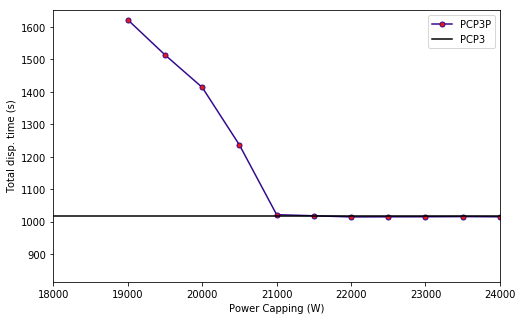

In [131]:
my_plot(data_pow['power_limit'].tolist(), data_stats['tot_disp_time'].tolist(), 1016.43, 200,
    'Total disp. time (s)', 'Power Capping (W)')

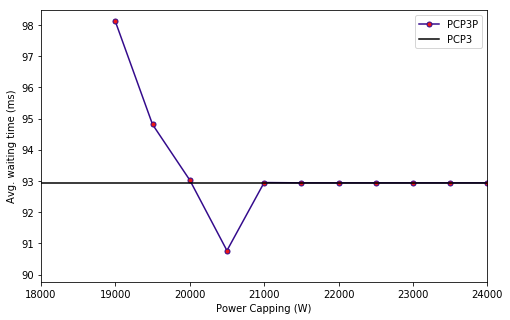

In [141]:
my_plot(data_pow['power_limit'].tolist(), data_stats['avg_wtimes'].tolist(), 92.94, 1,
    'Avg. waiting time (ms)', 'Power Capping (W)')

In [146]:
infile_stats = datadir + "integration/20141001-0500_20141005-2200/stats.csv"
infile_pow = datadir + "integration/20141001-0500_20141005-2200/stats_power_limits.csv"
data_stats = pd.read_csv(infile_stats, names=["sim_time", "disp_method", "total_jobs", 
                                              "makespan", "avg_wtimes", "avg_slowdown", 
                                              "tot_disp_time", "avg_disp_time"])
data_pow = pd.read_csv(infile_pow, names=["power_limit"])
print(data_stats.shape)
print(data_pow.shape)
print(data_pow)
data_stats

(6, 8)
(6, 1)
   power_limit
0        21000
1        21500
2        22500
3        23000
4        23500
5        24000


,sim_time,disp_method,total_jobs,makespan,avg_wtimes,avg_slowdown,tot_disp_time,avg_disp_time
0,1781.68,PCP3p,25304,417629,34.42,2.13,1765.09,148.89
1,1637.37,PCP3p,25304,417629,34.07,2.09,1617.54,136.57
2,1551.83,PCP3p,25304,417629,33.81,2.08,1532.61,128.97
3,1522.15,PCP3p,25304,417629,33.90,2.07,1502.78,125.91
4,1538.17,PCP3p,25304,417629,33.90,2.07,1516.61,127.07
5,1527.90,PCP3p,25304,417629,33.90,2.07,1507.63,126.32


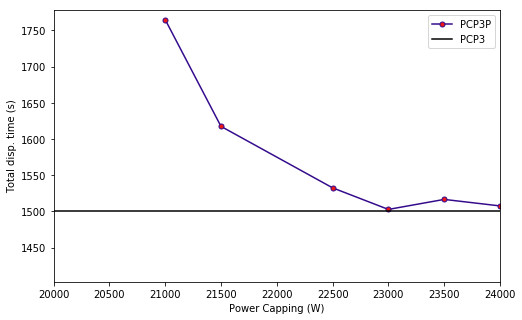

In [149]:
my_plot(data_pow['power_limit'].tolist(), data_stats['tot_disp_time'].tolist(), 1500.43, 100,
    'Total disp. time (s)', 'Power Capping (W)')

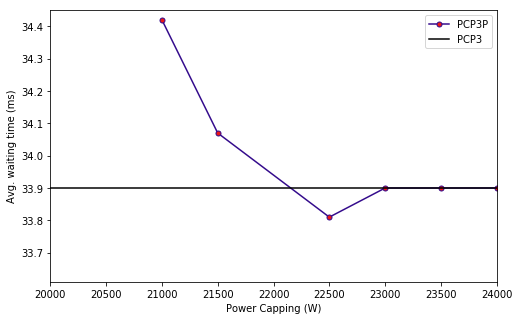

In [158]:
my_plot(data_pow['power_limit'].tolist(), data_stats['avg_wtimes'].tolist(), 33.9, 0.2,
    'Avg. waiting time (ms)', 'Power Capping (W)')

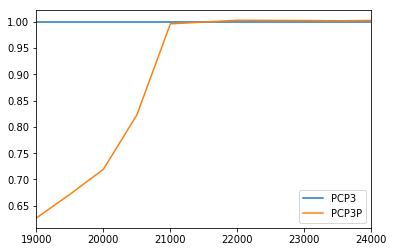

In [129]:
PCP3_div = [1017.17]*data_stats['tot_disp_time'].shape[0]
PCP3P_div = data_stats['tot_disp_time'].tolist() 
div = list(map(operator.__truediv__, PCP3_div, PCP3P_div))
df = pd.DataFrame({
   'PCP3P': div,
   'PCP3': [1.0]*data_stats['tot_disp_time'].shape[0]
   }, index=data_pow['power_limit'].tolist())
lines = df.plot.line()

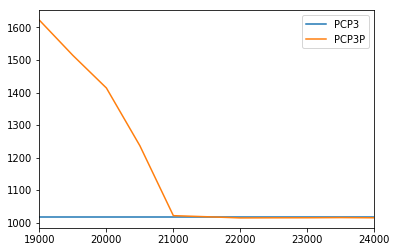

In [26]:
df = pd.DataFrame({
   'PCP3P': data_stats['tot_disp_time'].tolist(),
   'PCP3': [1017.17]*data_stats['tot_disp_time'].shape[0]
   }, index=data_pow['power_limit'].tolist())
lines = df.plot.line()

# PCP3
#Simulation time: 1017.17 secs
#Dispathing method: PCP3
#Total jobs: 6144
#Makespan: 166576
#Avg. waiting times: 92.94
#Avg. slowdown: 5.24

In [49]:
['0', '0'] + data_stats['tot_disp_time'].tolist()

['0',
 '0',
 1622.22,
 1514.03,
 1413.96,
 1236.42,
 1021.59,
 1018.26,
 1014.67,
 1015.02,
 1015.15,
 1015.66,
 1015.03]

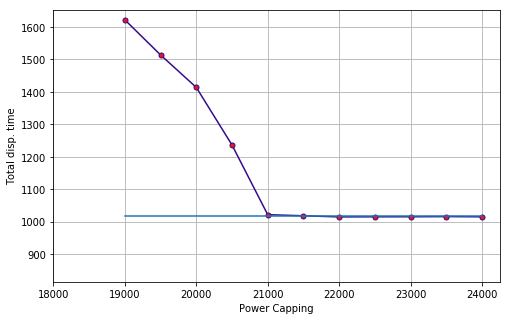

In [88]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (8, 5))
#plt.suptitle('plot title')
ax = []
#axes = plt.gca()
#axes.set_xlim([18000, None])
#axes.set_ylim([500, None])
plt.plot(data_pow['power_limit'].tolist(), 
         data_stats['tot_disp_time'].tolist(),
         color = '#340B8C', 
         marker = 'o', 
         ms = 5, 
         mfc = '#EB1717')
plt.plot(data_pow['power_limit'].tolist(),
        [1017.17]*(data_stats['tot_disp_time'].shape[0])
    )
plt.ylim(min(data_stats['tot_disp_time'].tolist()) - 200, None)
plt.xlim(min(data_pow['power_limit'].tolist()) - 1000, None)
#plt.xticks(data_pow['power_limit'].tolist())
plt.ylabel('Total disp. time')
plt.xlabel('Power Capping')
plt.grid(True)

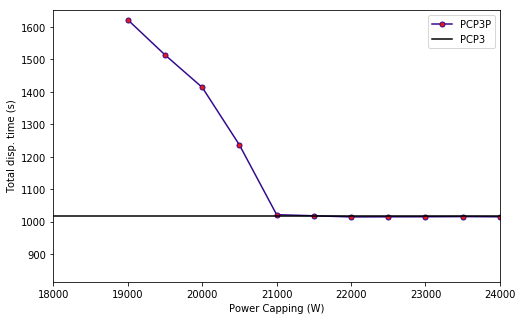

In [ ]:
def my_scatter_plot_small(x_values, y_values, xy_min, xy_lim, mark_s=100, title=""):

    #fig, = plt.figure(figsize=(9, 9))  
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    x1 = [0, xy_lim]
    y1 = [0, xy_lim]
    ax.plot(x1, y1, 'gray', linestyle=':', marker='')
    
    plt.xlabel('real pow (w)', fontsize=18)
    plt.ylabel('predicted pow (w)', fontsize=18)
    plt.title(title, fontsize=20)
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    plt.xlim(xy_min, xy_lim)
    plt.ylim(xy_min, xy_lim)
    #plt.gca().set_aspect('equal', adjustable='box')
    
    #visualize results
    plt.scatter(x_values, y_values, marker='x', s=mark_s)
    plt.plot()

    plt.show()

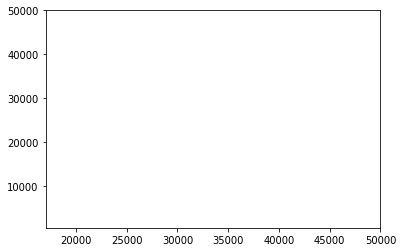

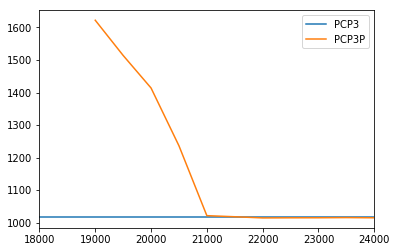

In [53]:
axes = plt.gca()
axes.set_xlim([17000, 50000])
axes.set_ylim([500, 50000])

df = pd.DataFrame({
   'PCP3P': [None, None] + data_stats['tot_disp_time'].tolist(),
   'PCP3': [1017.17]*(data_stats['tot_disp_time'].shape[0] + 2)
   }, index=['18000', '18500'] + data_pow['power_limit'].tolist())
lines = df.plot.line()

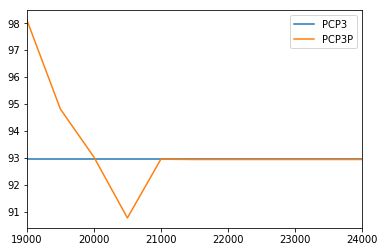

In [27]:
df = pd.DataFrame({
    'PCP3P': data_stats['avg_wtimes'].tolist(),
    'PCP3': [92.94]*data_stats['tot_disp_time'].shape[0]
   }, index=data_pow['power_limit'].tolist())

lines = df.plot.line()

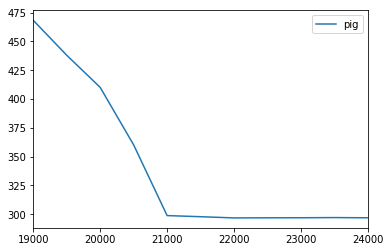

In [21]:
df = pd.DataFrame({
   'PCP3P': data_stats['avg_disp_time'].tolist()
   }, index=data_pow['power_limit'].tolist())
lines = df.plot.line()

In [ ]:
#----------------------------------------------